In [1]:
import json
import pandas as pd
from matplotlib.font_manager import FontProperties 
import numpy as np
import matplotlib.pyplot as plt

import dataset

In [2]:
players = pd.read_json(r"\Users\dilar\Downloads\dataset\players.json", orient = 'record')
teams = pd.read_json(r"\Users\dilar\Downloads\dataset\teams.json", orient = 'record')
coaches = pd.read_json(r"\Users\dilar\Downloads\dataset\coaches.json", orient = 'record')
premier_league_events = pd.read_json(r"\Users\dilar\Downloads\dataset\events\events_England.json", orient = 'record')
premier_league_matches = pd.read_json(r"\Users\dilar\Downloads\dataset\matches\matches_England.json", orient = 'record')


In [60]:
premier_league_matches_sorted_by_week = premier_league_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in premier_league_matches_sorted_by_week.iterrows():# premier_league_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    
    
    
    

In [76]:
kk= []
localmax =2
max=0

for j in range(len(teams_list)):
    
    stringg=  teams_list[j]
    for key in premier_league_by_week1:
        print(stringg)
        kk.append(premier_league_by_week1[key][stringg]['points'] )
        print(kk)
    print('baslangic')
    for z in range(1,39):
        
        
        if (z<=36) and (kk[z-1] == kk[z] == kk[z+1]==3):
            localmax = localmax +1
        if localmax > max:
            max = localmax
        localmax=2
    print(max)
           
            
    
       



Arsenal
[3]
Arsenal
[3, 0]
Arsenal
[3, 0, 0]
Arsenal
[3, 0, 0, 3]
Arsenal
[3, 0, 0, 3, 1]
Arsenal
[3, 0, 0, 3, 1, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 3, 1]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 3, 1, 3]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 3, 1, 3, 1]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 3, 1, 3, 1, 1]
Arsenal
[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3

[3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 3, 1, 3, 1, 1, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 1, 3, 0, 3, 0, 1, 3, 1, 3, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 3, 1, 3, 3, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 3, 1, 1, 3, 0, 0, 3, 0, 0, 3, 3, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 3, 0, 3, 1, 3, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 3, 0, 3, 1, 0, 0, 0, 3, 0, 1, 0, 0, 3, 1, 0, 3, 3, 1, 3, 3, 1, 1, 0, 0, 0, 1, 3, 0, 3, 0, 0, 3, 3, 0, 1, 1, 3, 3, 1, 0, 1, 3, 1, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 0, 1, 3, 1, 0, 3, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 

In [30]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

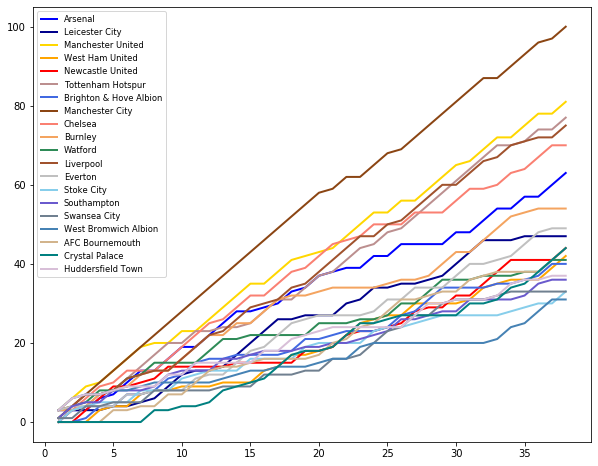

In [31]:
color_names = [
'blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown','seagreen','sienna','silver','skyblue','slateblue','slategray',
'steelblue','tan','teal','thistle','tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('small')
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.legend(prop=fontP)
plt.show()